# 160k Spotify songs from 1921 to 2020 

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (replace with your file path)
file_path = "../data/spotify.csv" 
data = pd.read_csv(file_path)

# Preview the dataset
print("Initial Dataset Shape:", data.shape)
data.head()


Initial Dataset Shape: (169907, 19)


,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,0gNNToCW3qjabgTyBSjt3H,!Que Vida! - Mono Version,['Love'],220560,11/1/66,1966,0.5250,0.600,0.540,0.00305,0.100,-11.803,0.0328,125.898,0.547,1,9,26,0
1,0tMgFpOrXZR6irEOLNWwJL,"""40""",['U2'],157840,2/28/83,1983,0.2280,0.368,0.480,0.70700,0.159,-11.605,0.0306,150.166,0.338,1,8,21,0
2,2ZywW3VyVx6rrlrX75n3JB,"""40"" - Live",['U2'],226200,8/20/83,1983,0.0998,0.272,0.684,0.01450,0.946,-9.728,0.0505,143.079,0.279,1,8,41,0
3,6DdWA7D1o5TU2kXWyCLcch,"""40"" - Remastered 2008",['U2'],157667,2/28/83,1983,0.1850,0.371,0.545,0.58200,0.183,-9.315,0.0307,150.316,0.310,1,8,37,0
4,3vMmwsAiLDCfyc1jl76lQE,"""40"" - Remastered 2008",['U2'],157667,2/28/83,1983,0.1850,0.371,0.545,0.58200,0.183,-9.315,0.0307,150.316,0.310,1,8,35,0


In [17]:
# Data Cleaning: Remove NaN values and duplicates
data_cleaned = data.dropna().drop_duplicates()
print("Dataset Shape After Cleaning:", data_cleaned.shape)

# Convert duration from milliseconds to minutes for better understanding
data_cleaned['duration_min'] = data_cleaned['duration_ms'] / 60000

Dataset Shape After Cleaning: (169907, 19)


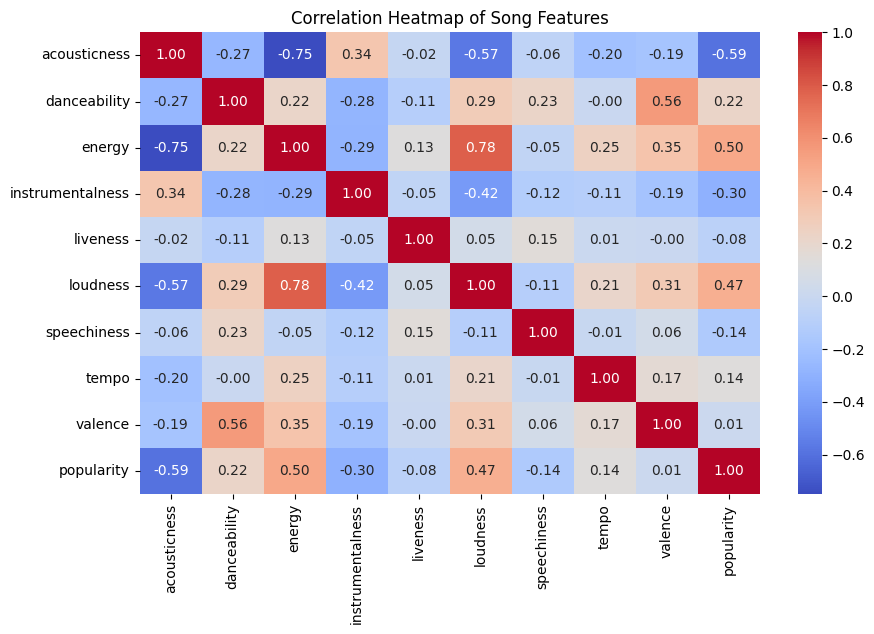

In [18]:
# Heatmap: Correlations between numerical features
plt.figure(figsize=(10, 6))
correlation_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']
correlation_matrix = data_cleaned[correlation_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Song Features")
plt.show()

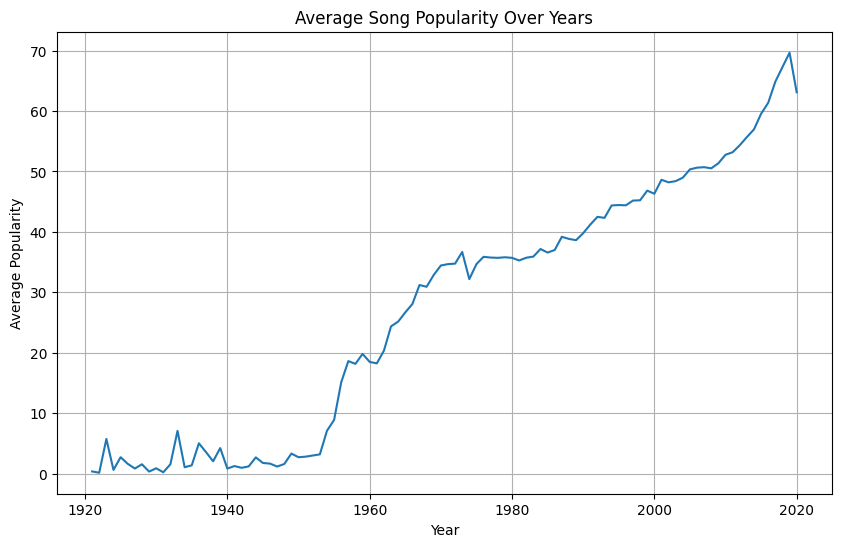

In [19]:

# Line Chart: Trend of average popularity over years
popularity_by_year = data_cleaned.groupby('year')['popularity'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='popularity', data=popularity_by_year)
plt.title("Average Song Popularity Over Years")
plt.xlabel("Year")
plt.ylabel("Average Popularity")
plt.grid()
plt.show()

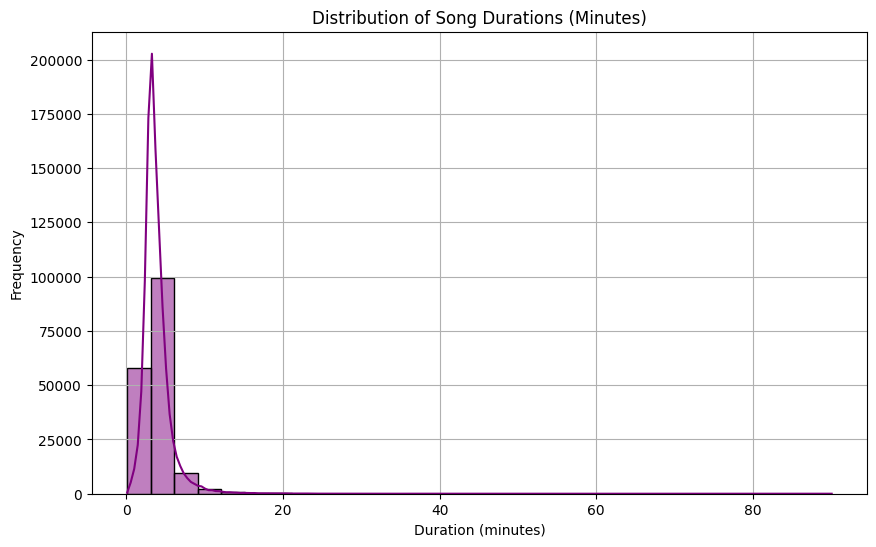

In [20]:

# Histogram: Distribution of song durations (minutes)
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['duration_min'], bins=30, kde=True, color='purple')
plt.title("Distribution of Song Durations (Minutes)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.grid()
plt.show()


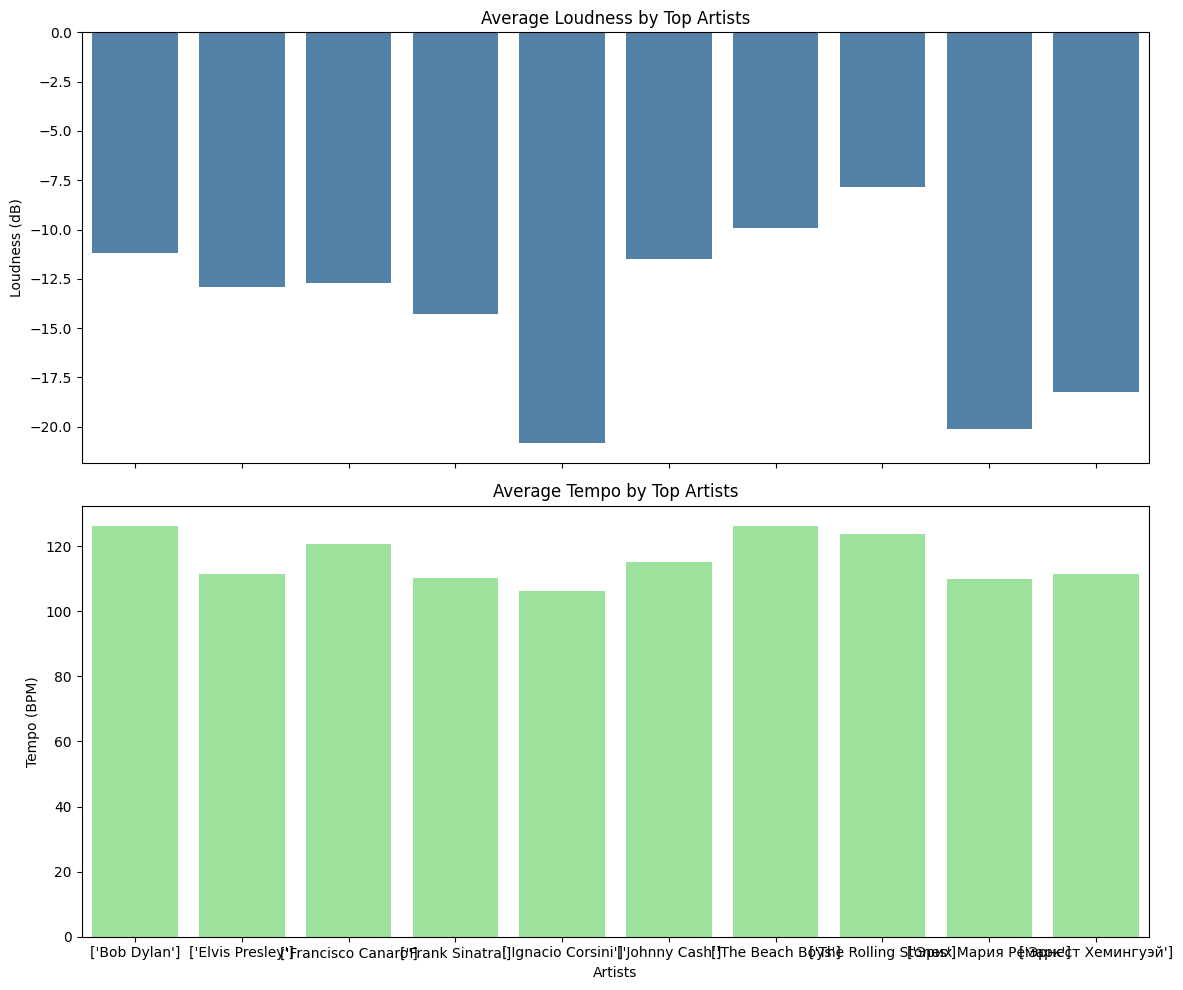

In [21]:
# Subplots: Comparing average loudness and tempo across top artists
top_artists = data_cleaned['artists'].value_counts().head(10).index
artist_data = data_cleaned[data_cleaned['artists'].isin(top_artists)]
loudness_by_artist = artist_data.groupby('artists')['loudness'].mean()
tempo_by_artist = artist_data.groupby('artists')['tempo'].mean()

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Loudness by artists
sns.barplot(
    x=loudness_by_artist.index,
    y=loudness_by_artist.values,
    ax=axes[0],
    color="steelblue"  # Single color instead of palette
)
axes[0].set_title("Average Loudness by Top Artists")
axes[0].set_ylabel("Loudness (dB)")

# Tempo by artists
sns.barplot(
    x=tempo_by_artist.index,
    y=tempo_by_artist.values,
    ax=axes[1],
    color="lightgreen"  # Single color instead of palette
)
axes[1].set_title("Average Tempo by Top Artists")
axes[1].set_ylabel("Tempo (BPM)")
axes[1].set_xlabel("Artists")

plt.tight_layout()
plt.show()
